# Diccionarios

Elementos basicos con diccionarios

In [3]:
students_class = { "Bob": "Physics","Alice": "Physics","Ana": "Biology" }

In [4]:
students_class

{'Alice': 'Physics', 'Ana': 'Biology', 'Bob': 'Physics'}

In [5]:
students_class["Bob"]

'Physics'

In [ ]:
for i, s in enumerate(students_class):
  print(i, s, students_class[s])


0 Bob Physics
1 Alice Physics
2 Ana Biology


In [ ]:
students_class.items()

dict_items([('Bob', 'Physics'), ('Alice', 'Physics'), ('Ana', 'Biology')])

Otra forma de iteraciones para los diccionarios a través del metodo items()

In [ ]:
for key, val in students_class.items():
  print(key, val)

Bob Physics
Alice Physics
Ana Biology


Accediendo a los valores del diccionario
Accediendo a las claves
- metodo keys()
- metodo values()

In [ ]:
print(students_class.values())
print(students_class.keys())

dict_values(['Physics', 'Physics', 'Biology'])
dict_keys(['Bob', 'Alice', 'Ana'])


In [ ]:
for val in students_class.values():
  print(val)

Physics
Physics
Biology


In [ ]:
for val in students_class.keys():
  print(val)

Bob
Alice
Ana


In [ ]:
import numpy as np
g = 9.8
def posiciones(vo, theta, t):
  posx = vo*np.cos(theta)*t
  posy = vo*np.sin(theta)*t-0.5*g*t

  dicc={"X":posx, "Y":posy}

  return dicc


In [ ]:
r = posiciones(0.3, np.pi/3, 0.1)

In [ ]:
r["Y"]

-0.4640192378864669

# Pandas.

## Series
## Data Frame

In [ ]:
import pandas as pd
students_class = { "Bob": "Physics",
                  "Alice": "Chemistry",
                  "Ana": "Biology" }

In [ ]:
# Ndarray unidimensional con ejes etiquetados
s = pd.Series(students_class)
s

Bob        Physics
Alice    Chemistry
Ana        Biology
dtype: object

In [ ]:
# https://pandas.pydata.org/docs/reference/series.html
print(type(s.index))
s.index

<class 'pandas.core.indexes.base.Index'>


Index(['Bob', 'Alice', 'Ana'], dtype='object')

In [ ]:
#Forma de acceder a los elementos con el número del indice
s.iloc[2]

'Biology'

In [ ]:
#Forma de acceder a los indices
s.loc["Ana"]

'Biology'

In [ ]:
s.Ana

'Biology'

### Definición clave valor con enteros como clave. 

In [ ]:
class_code = {99:"Physics", 
              100:"Chemistry", 
              101:"English" }

In [ ]:
s = pd.Series(class_code)

In [ ]:
s

99       Physics
100    Chemistry
101      English
dtype: object

In [ ]:
s.iloc[2]

'English'

In [ ]:
s.loc[101]

'English'

In [ ]:
s.101

SyntaxError: ignored

Tambien podemos definir el objeto Serie  a partir de una lista

In [ ]:
grades = pd.Series([8,7,10,1])

In [ ]:
grades

0     8
1     7
2    10
3     1
dtype: int64

In [ ]:
grades.loc[2]

10

In [ ]:
type(grades)

pandas.core.series.Series

In [ ]:
for i, g in enumerate(grades):
  print(i,g)

0 8
1 7
2 10
3 1


In [ ]:
grades.max()

10

In [ ]:
grades.describe()

count     4.000000
mean      6.500000
std       3.872983
min       1.000000
25%       5.500000
50%       7.500000
75%       8.500000
max      10.000000
dtype: float64

Definicion a través de un  numpy array 



In [ ]:
x = np.random.randint(0,20, 100)
random_s = pd.Series(x)

In [ ]:
random_s

0     12
1     16
2     19
3     18
4     10
      ..
95     1
96     0
97    18
98    10
99     3
Length: 100, dtype: int64

In [ ]:
random_s.tail()

95     1
96     0
97    18
98    10
99     3
dtype: int64

In [ ]:
#Recorrido por las claves y valores, el metodo head es considerado para mostrar pocos valores
for index, values in random_s.head().iteritems():
  print(index, values)

0 12
1 16
2 19
3 18
4 10


In [ ]:
%%timeit -n 100
x = np.random.randint(0,20, 100)
random_s = pd.Series(x)
random_s+=2 # OPeraciones vectoriales a todo el data frame, más eficiente.

#Comparar cuando se tiene un ciclo para realizar la suma, ¿cuál es mas eficiente?

100 loops, best of 5: 268 µs per loop


Agregando nuevos valores con indices diferentes



In [ ]:
s = pd.Series([1,2,3,4,9])

In [ ]:
s

0    1
1    2
2    3
3    4
4    9
dtype: int64

In [ ]:
s.loc["nuevo"]=2

In [ ]:
s

0        1
1        2
2        3
3        4
4        9
nuevo    2
dtype: int64

In [ ]:
s.loc["nuevo"]

2

In [ ]:
s["nuevo"]

2

In [ ]:
s.iloc[0]


1

Otra *forma* de definir una serie es a través de :

In [ ]:
juan_class = pd.Series(["a", "b","c"], index=["letraAbeecedario","1","2"])

In [ ]:
juan_class

letraAbeecedario    a
1                   b
2                   c
dtype: object

# Data Frame 



Un DataFrame es una lista  de series



In [ ]:
d1 = { "Name":"Juan", "Topic":"Quantum Mechanics", "Score" : 10}
d2 = { "Name":"Pedro", "Topic":"statistical", "Score" : 10}
d3 = { "Name":"Ana", "Topic":"Clasical Mechanics", "Score" : 10}

record1 = pd.Series(d1)
record2 = pd.Series(d2)
record3 = pd.Series(d3)

In [ ]:
# indices con números enteros
df1 = pd.DataFrame( [record1, record2, record3] )
df1

,Name,Topic,Score
0,Juan,Quantum Mechanics,10
1,Pedro,statistical,10
2,Ana,Clasical Mechanics,10


In [ ]:
df1.Name

0     Juan
1    Pedro
2      Ana
Name: Name, dtype: object

In [ ]:
df1.iloc[0]

Name                  Juan
Topic    Quantum Mechanics
Score                   10
Name: 0, dtype: object

In [ ]:
# Asignando nombre a los indices
df2 = pd.DataFrame( [record1, record2, record3] , index = ["UdeA","Unal", "ITM"] )
df2

,Name,Topic,Score
UdeA,Juan,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


In [ ]:
#Accediendo a los indices por el nombre
df2.loc["UdeA"]

Name                  Juan
Topic    Quantum Mechanics
Score                   10
Name: UdeA, dtype: object

In [ ]:
#Accediendo a los indices por el numero
df2.iloc[0]

Name                  Juan
Topic    Quantum Mechanics
Score                   10
Name: UdeA, dtype: object

In [ ]:
#Accediendo a un elemento en particular
df2.loc["UdeA", "Name"]


'Juan'

In [ ]:
df2.iloc[0].Name

'Juan'

In [ ]:
#Accediendo a algunas columnas del data frame
df2.loc[:, ["Name", "Topic"]]

,Name,Topic
UdeA,Juan,Quantum Mechanics
Unal,Pedro,statistical
ITM,Ana,Clasical Mechanics


Se recomienda crear copias del data frame cuando se esta trabajando con pandas a traves del metodo copy() y no con el operador =, dado que se comparte el mismo espacio de memoria

In [ ]:
df2

,Name,Topic,Score
UdeA,Juan,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


In [ ]:
a = df2

In [ ]:
a

,Name,Topic,Score
UdeA,Juan,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


In [ ]:
a.loc["UdeA", "Name"] = "JuanB"

In [ ]:
a

,Name,Topic,Score
UdeA,JuanB,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


In [ ]:
df2

,Name,Topic,Score
UdeA,JuanB,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


In [ ]:
b = df2.copy()

In [ ]:
b

,Name,Topic,Score
UdeA,JuanB,Quantum Mechanics,10
Unal,Pedro,statistical,10
ITM,Ana,Clasical Mechanics,10


Eliminacion de columnas

In [ ]:
del b["Topic"]

In [ ]:
b

,Name,Score
UdeA,JuanB,10
Unal,Pedro,10
ITM,Ana,10


 Agregando nuevas columnas al data frame

In [ ]:
b["Nueva"] = [10, 8, 3]

In [ ]:
b

,Name,Score,Nueva
UdeA,JuanB,10,10
Unal,Pedro,10,8
ITM,Ana,10,3


In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
sx=np.ones(len(x))

In [ ]:
df = pd.DataFrame({"X":x, "Y":y,"Sx":sx ,"Sy":sx})

In [ ]:
df

,X,Y,Sx,Sy
0,0.00000,0.000000,1.0,1.0
1,0.10101,0.100838,1.0,1.0
2,0.20202,0.200649,1.0,1.0
3,0.30303,0.298414,1.0,1.0
4,0.40404,0.393137,1.0,1.0
...,...,...,...,...
95,9.59596,-0.170347,1.0,1.0
96,9.69697,-0.268843,1.0,1.0
97,9.79798,-0.364599,1.0,1.0
98,9.89899,-0.456637,1.0,1.0


In [ ]:
import matplotlib.pylab as plt

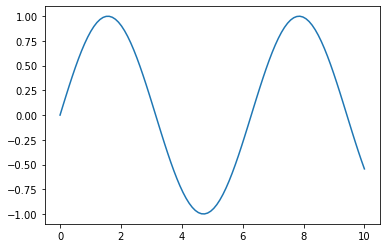

In [ ]:
plt.plot(df.X, df.Y)